<a href="https://colab.research.google.com/github/wasef-c/emotion_rec/blob/main/Emotion_Classification_ModelComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last updated: 16 Feb 2023

# 👋 PyCaret Multiclass Classification Tutorial

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that exponentially speeds up the experiment cycle and makes you more productive.

Compared with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with a few lines only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks, such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and a few more.

The design and simplicity of PyCaret are inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more technical expertise.


# 💻 Installation

PyCaret is tested and supported on the following 64-bit systems:
- Python 3.7 – 3.10
- Python 3.9 for Ubuntu only
- Ubuntu 16.04 or later
- Windows 7 or later

You can install PyCaret with Python's pip package manager:

`pip install pycaret`

PyCaret's default installation will not install all the extra dependencies automatically. For that you will have to install the full version:

`pip install pycaret[full]`

or depending on your use-case you may install one of the following variant:

- `pip install pycaret[analysis]`
- `pip install pycaret[models]`
- `pip install pycaret[tuner]`
- `pip install pycaret[mlops]`
- `pip install pycaret[parallel]`
- `pip install pycaret[test]`

In [1]:
# check installed version
!pip install pycaret
import pycaret
pycaret.__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.0 MB/s e

'3.2.0'

# 🚀 Quick start

In [2]:
import numpy as np
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Make sure you make your X and Y Datasets from the noteboook data-preprocessing here:**

https://colab.research.google.com/drive/1dD9sspV9kJ0HjqX2sTjH-3DFNpLKY8QY?usp=sharing

In [4]:
save_directory = r'/content/drive/MyDrive/MASC/Saved_Sets/008'

X = np.load(os.path.join(save_directory, 'X_Te008.npy'))
Y = np.load(os.path.join(save_directory, 'Y_Te008.npy'))

In [6]:
print(X.shape)

(3614, 87, 128)


In [7]:
import numpy as np
from sklearn.decomposition import PCA

'''Due to the size of the features, it will be compressed using PCA components to reduce computing time for model comparisons'''
X1_reshaped = X.reshape(3614, -1)

# Perform PCA with n_components=435
pca = PCA(n_components=435)
mel_spectrogram_reduced = pca.fit_transform(X1_reshaped)

# The reduced array should have shape (3614, 435)
print(mel_spectrogram_reduced.shape)

# Assign the reduced array to X_New
X_New = mel_spectrogram_reduced


(3614, 435)


In [8]:
import pandas as pd
data = pd.DataFrame(X_New)

target_variable = Y  # Replace this with your target variable array or column

# Adding the target variable to the DataFrame
data['emotion'] = target_variable

data.head()

,0,1,2,3,4,5,6,7,8,9,...,426,427,428,429,430,431,432,433,434,emotion
0,-4.421193,48.034050,43.710751,-36.978573,-5.408204,-17.279652,9.759752,4.113785,-14.237334,6.164262,...,0.826407,-0.952323,0.312231,-0.419403,1.388310,0.698919,0.418901,0.153705,0.373307,2
1,34.635277,18.939880,32.991428,21.993864,18.633106,10.925182,-19.979052,-21.787346,-25.320398,3.230996,...,1.860579,0.933420,-0.341876,-1.139207,-1.070187,-1.866835,0.009126,1.318709,-1.384961,2
2,49.979282,5.059116,-26.235247,-18.233500,-25.018806,-20.839941,-18.629585,4.953315,6.238579,-11.898462,...,-0.715076,-0.365361,1.083921,0.218275,-0.935297,0.062110,0.175130,0.389859,0.872834,0
3,53.880905,-21.084242,-18.905352,-19.979179,10.632112,-4.539346,14.382754,45.521267,3.753341,-2.538512,...,-0.495285,-1.036494,-0.702296,0.846810,-0.012770,0.665461,0.259489,0.134973,0.219492,5
4,-5.113591,64.299911,-29.095510,31.582041,-11.151687,27.203779,-11.153125,13.484769,0.795665,-5.465744,...,0.940920,-0.177162,-1.295127,0.315357,0.139498,-0.204210,0.058099,1.803542,-0.164666,5


## Setup
This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function in PyCaret. It only has two required parameters i.e. `data` and `target`. All the other parameters are optional.

In [9]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'emotion', session_id = 123)

,Description,Value
0,Session id,123
1,Target,emotion
2,Target type,Multiclass
3,Original data shape,"(3614, 436)"
4,Transformed data shape,"(3614, 436)"
5,Transformed train set shape,"(2529, 436)"
6,Transformed test set shape,"(1085, 436)"
7,Numeric features,435
8,Preprocess,True
9,Imputation type,simple


Once the setup has been successfully executed it shows the information grid containing experiment level information.

- **Session id:**  A pseudo-random number distributed as a seed in all functions for later reproducibility. If no `session_id` is passed, a random number is automatically generated that is distributed to all functions.<br/>
<br/>
- **Target type:**  Binary, Multiclass, or Regression. The Target type is automatically detected. <br/>
<br/>
- **Label Encoding:**  When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. In this tutorial, no label encoding is required since the target variable is of numeric type. <br/>
<br/>
- **Original data shape:**  Shape of the original data prior to any transformations. <br/>
<br/>
- **Transformed train set shape :**  Shape of transformed train set <br/>
<br/>
- **Transformed test set shape :**  Shape of transformed test set <br/>
<br/>
- **Numeric features :**  The number of features considered as numerical. <br/>
<br/>
- **Categorical features :**  The number of features considered as categorical. <br/>

PyCaret has two set of API's that you can work with. (1) Functional (as seen above) and (2) Object Oriented API.

With Object Oriented API instead of executing functions directly you will import a class and execute methods of class.

In [10]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [11]:
# init setup on exp
# Assuming there's a setup method that takes a 'use_gpu' parameter
exp.setup(data, target='emotion', session_id=123)


,Description,Value
0,Session id,123
1,Target,emotion
2,Target type,Multiclass
3,Original data shape,"(3614, 436)"
4,Transformed data shape,"(3614, 436)"
5,Transformed train set shape,"(2529, 436)"
6,Transformed test set shape,"(1085, 436)"
7,Numeric features,435
8,Preprocess,True
9,Imputation type,simple


You can use any of the two method i.e. Functional or OOP and even switch back and forth between two set of API's. The choice of method will not impact the results and has been tested for consistency.

## Compare Models

This function trains and evaluates the performance of all the estimators available in the model library using cross-validation. The output of this function is a scoring grid with average cross-validated scores. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [12]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.4282,0.7482,0.4282,0.4262,0.4245,0.3040,0.3048,0.5600
ridge,Ridge Classifier,0.4274,0.0000,0.4274,0.4246,0.4203,0.2998,0.3012,0.0680
svm,SVM - Linear Kernel,0.4183,0.0000,0.4183,0.4199,0.4151,0.2900,0.2913,1.0520
lightgbm,Light Gradient Boosting Machine,0.4183,0.7451,0.4183,0.4411,0.4043,0.2790,0.2852,93.9530
xgboost,Extreme Gradient Boosting,0.4176,0.7396,0.4176,0.4233,0.4088,0.2827,0.2859,38.0950
gbc,Gradient Boosting Classifier,0.4092,0.7368,0.4092,0.4132,0.3964,0.2707,0.2747,162.6070
knn,K Neighbors Classifier,0.4001,0.7064,0.4001,0.4325,0.3932,0.2605,0.2676,0.1730
et,Extra Trees Classifier,0.3816,0.7035,0.3816,0.4637,0.3531,0.2239,0.2393,0.8160
rf,Random Forest Classifier,0.3772,0.7026,0.3772,0.4505,0.3477,0.2190,0.2332,3.7610
lr,Logistic Regression,0.3673,0.6973,0.3673,0.3733,0.3683,0.2346,0.2352,4.2080


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Analyze Model

You can use the `plot_model` function to analyzes the performance of a trained model on the test set. It may require re-training the model in certain cases.

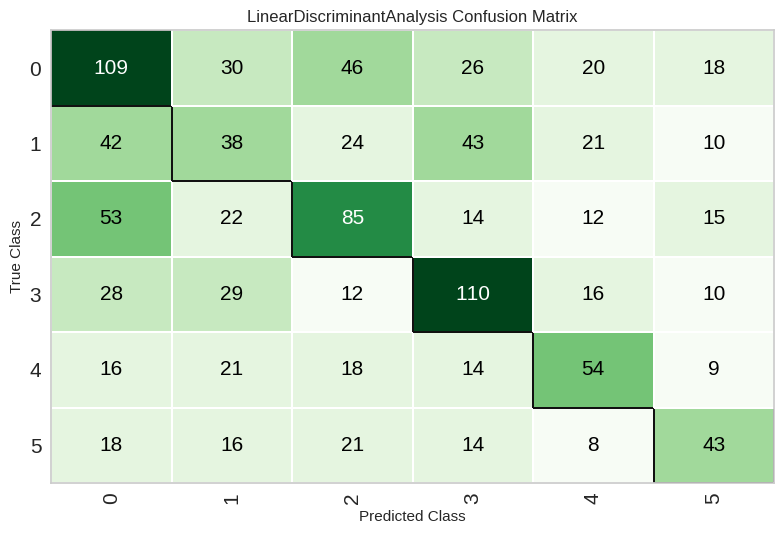

In [13]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

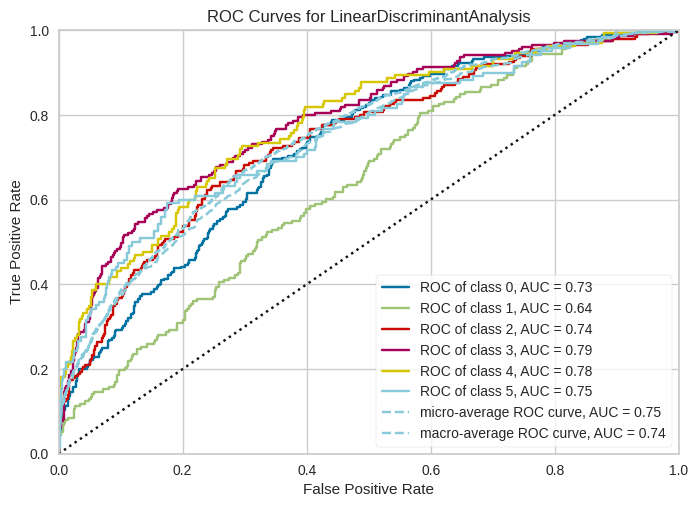

In [14]:
# plot AUC
plot_model(best, plot = 'auc')

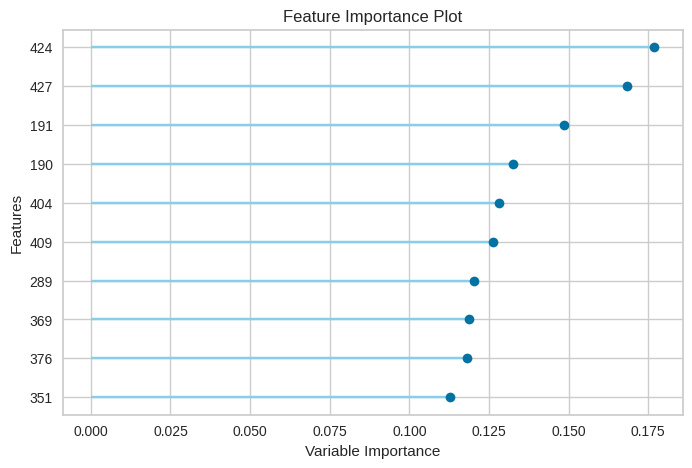

In [15]:
# plot feature importance
plot_model(best, plot = 'feature')

An alternate to `plot_model` function is `evaluate_model`. It can only be used in Notebook since it uses ipywidget.

In [16]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Prediction
The `predict_model` function returns `prediction_label` and `prediction_score` (probability of the predicted class) as new columns in dataframe. When data is `None` (default), it uses the test set (created during the setup function) for scoring.

In [17]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.4046,0.7349,0.4046,0.3999,0.4017,0.2749,0.2751


In [18]:
# show predictions df
holdout_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,428,429,430,431,432,433,434,emotion,prediction_label,prediction_score
3364,22.772852,6.822019,-6.774965,14.601407,-10.170280,1.534428,24.016325,4.768875,13.704266,-33.044369,...,0.870326,-1.220686,-0.804868,0.463635,-0.262601,0.258791,2.048403,1,3,0.5027
1378,-15.012897,-11.483865,26.756079,7.391891,16.802876,14.632126,19.319836,5.071638,-18.373087,10.032571,...,0.313094,0.028034,-1.369511,0.048966,0.635832,-0.221901,0.682102,3,3,0.5984
1871,-31.826281,46.197968,-37.909599,-12.234676,31.695789,-5.499684,-19.653725,-6.618843,18.096777,-13.505451,...,0.820246,0.285905,0.976539,-0.589035,0.161662,0.059574,-0.064287,0,2,0.8879
2087,-4.510291,47.594631,47.110989,-40.190605,-8.686222,-14.801917,8.432057,10.509132,-10.338474,8.638831,...,0.411034,-0.460181,0.253693,0.255596,-0.508756,0.755184,0.272034,1,0,0.4296
2045,-9.826574,-23.707718,-1.293003,-24.953335,1.282740,15.505294,-11.606531,-11.552564,-3.485123,-7.582599,...,-0.743835,-0.451675,-0.173987,-0.652203,0.561730,-1.681285,0.253124,1,3,0.5157


The same function works for predicting the labels on unseen dataset. Let's create a copy of original data and drop the `Class variable`. We can then use the new data frame without labels for scoring.

In [19]:
# copy data and drop Class variable

new_data = data.copy()
new_data.drop('emotion', axis=1, inplace=True)
new_data.head()

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
0,-4.421193,48.034050,43.710751,-36.978573,-5.408204,-17.279652,9.759752,4.113785,-14.237334,6.164262,...,0.196219,0.826407,-0.952323,0.312231,-0.419403,1.388310,0.698919,0.418901,0.153705,0.373307
1,34.635277,18.939880,32.991428,21.993864,18.633106,10.925182,-19.979052,-21.787346,-25.320398,3.230996,...,-0.832227,1.860579,0.933420,-0.341876,-1.139207,-1.070187,-1.866835,0.009126,1.318709,-1.384961
2,49.979282,5.059116,-26.235247,-18.233500,-25.018806,-20.839941,-18.629585,4.953315,6.238579,-11.898462,...,-1.585108,-0.715076,-0.365361,1.083921,0.218275,-0.935297,0.062110,0.175130,0.389859,0.872834
3,53.880905,-21.084242,-18.905352,-19.979179,10.632112,-4.539346,14.382754,45.521267,3.753341,-2.538512,...,-0.210432,-0.495285,-1.036494,-0.702296,0.846810,-0.012770,0.665461,0.259489,0.134973,0.219492
4,-5.113591,64.299911,-29.095510,31.582041,-11.151687,27.203779,-11.153125,13.484769,0.795665,-5.465744,...,-0.682492,0.940920,-0.177162,-1.295127,0.315357,0.139498,-0.204210,0.058099,1.803542,-0.164666


In [20]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,0,1,2,3,4,5,6,7,8,9,...,427,428,429,430,431,432,433,434,prediction_label,prediction_score
0,-4.421193,48.034050,43.710751,-36.978573,-5.408204,-17.279652,9.759752,4.113785,-14.237334,6.164262,...,-0.952323,0.312231,-0.419403,1.388310,0.698919,0.418901,0.153705,0.373307,2,0.5180
1,34.635277,18.939880,32.991428,21.993864,18.633106,10.925182,-19.979052,-21.787346,-25.320398,3.230996,...,0.933420,-0.341876,-1.139207,-1.070187,-1.866835,0.009126,1.318709,-1.384961,0,0.8863
2,49.979282,5.059116,-26.235247,-18.233500,-25.018806,-20.839941,-18.629585,4.953315,6.238579,-11.898462,...,-0.365361,1.083921,0.218275,-0.935297,0.062110,0.175130,0.389859,0.872834,0,0.9952
3,53.880905,-21.084242,-18.905352,-19.979179,10.632112,-4.539346,14.382754,45.521267,3.753341,-2.538512,...,-1.036494,-0.702296,0.846810,-0.012770,0.665461,0.259489,0.134973,0.219492,5,0.9989
4,-5.113591,64.299911,-29.095510,31.582041,-11.151687,27.203779,-11.153125,13.484769,0.795665,-5.465744,...,-0.177162,-1.295127,0.315357,0.139498,-0.204210,0.058099,1.803542,-0.164666,5,0.8858


# DROP BOTTOM 100 FEATURES

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Assuming 'best' is your trained LDA model
best_lda = best  # Replace 'best' with your LDA model

# Fit the LDA model to your data
best_lda.fit(X_New, Y)  # Assuming you have your training data X_train and y_train

# Get the coefficients or loadings of the features
feature_importance_lda = best_lda.coef_[0]  # This assumes binary classification; adjust for multi-class

# Create a dictionary with feature names as keys and absolute coefficients as values
feature_importance_dict_lda = dict(zip(data.columns, abs(feature_importance_lda)))

# Sort the features based on their importance (absolute coefficients)
sorted_features_lda = sorted(feature_importance_dict_lda.items(), key=lambda x: x[1])

# Extract the 10 features with the lowest absolute coefficients
lowest_features_lda = [feature[0] for feature in sorted_features_lda[:100]]

# Drop the 10 lowest coefficient features from your dataframe
optimized_data = data.drop(lowest_features_lda, axis=1)


In [26]:
# init setup on exp
# Assuming there's a setup method that takes a 'use_gpu' parameter
exp.setup(optimized_data, target='emotion', session_id=123)

,Description,Value
0,Session id,123
1,Target,emotion
2,Target type,Multiclass
3,Original data shape,"(3614, 336)"
4,Transformed data shape,"(3614, 336)"
5,Transformed train set shape,"(2529, 336)"
6,Transformed test set shape,"(1085, 336)"
7,Numeric features,335
8,Preprocess,True
9,Imputation type,simple


In [27]:
# compare baseline models
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:06:45
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.4282,0.7482,0.4282,0.4262,0.4245,0.3040,0.3048,0.3660
ridge,Ridge Classifier,0.4274,0.0000,0.4274,0.4246,0.4203,0.2998,0.3012,0.0730
svm,SVM - Linear Kernel,0.4183,0.0000,0.4183,0.4199,0.4151,0.2900,0.2913,1.0260
gbc,Gradient Boosting Classifier,0.4092,0.7368,0.4092,0.4132,0.3964,0.2707,0.2747,163.8920
knn,K Neighbors Classifier,0.4001,0.7064,0.4001,0.4325,0.3932,0.2605,0.2676,0.1720
et,Extra Trees Classifier,0.3816,0.7035,0.3816,0.4637,0.3531,0.2239,0.2393,1.1170
rf,Random Forest Classifier,0.3772,0.7026,0.3772,0.4505,0.3477,0.2190,0.2332,3.7530
lr,Logistic Regression,0.3673,0.6973,0.3673,0.3733,0.3683,0.2346,0.2352,4.2800
nb,Naive Bayes,0.3124,0.6299,0.3124,0.3768,0.2921,0.1785,0.1903,0.1220
ada,Ada Boost Classifier,0.3037,0.6575,0.3037,0.2984,0.2981,0.1488,0.1494,5.6900


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.4282,0.7482,0.4282,0.4262,0.4245,0.3040,0.3048,0.3660
ridge,Ridge Classifier,0.4274,0.0000,0.4274,0.4246,0.4203,0.2998,0.3012,0.0730
svm,SVM - Linear Kernel,0.4183,0.0000,0.4183,0.4199,0.4151,0.2900,0.2913,1.0260
lightgbm,Light Gradient Boosting Machine,0.4183,0.7451,0.4183,0.4411,0.4043,0.2790,0.2852,91.2850
xgboost,Extreme Gradient Boosting,0.4176,0.7396,0.4176,0.4233,0.4088,0.2827,0.2859,37.0690
gbc,Gradient Boosting Classifier,0.4092,0.7368,0.4092,0.4132,0.3964,0.2707,0.2747,163.8920
knn,K Neighbors Classifier,0.4001,0.7064,0.4001,0.4325,0.3932,0.2605,0.2676,0.1720
et,Extra Trees Classifier,0.3816,0.7035,0.3816,0.4637,0.3531,0.2239,0.2393,1.1170
rf,Random Forest Classifier,0.3772,0.7026,0.3772,0.4505,0.3477,0.2190,0.2332,3.7530
lr,Logistic Regression,0.3673,0.6973,0.3673,0.3733,0.3683,0.2346,0.2352,4.2800


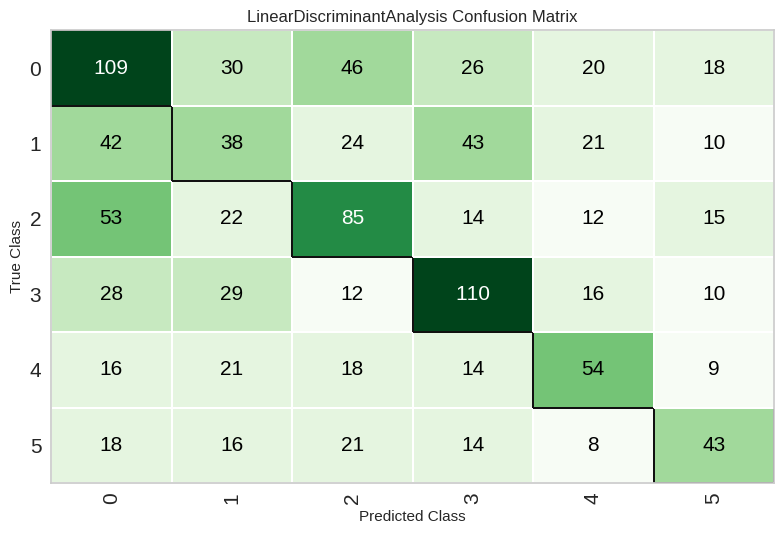

In [28]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

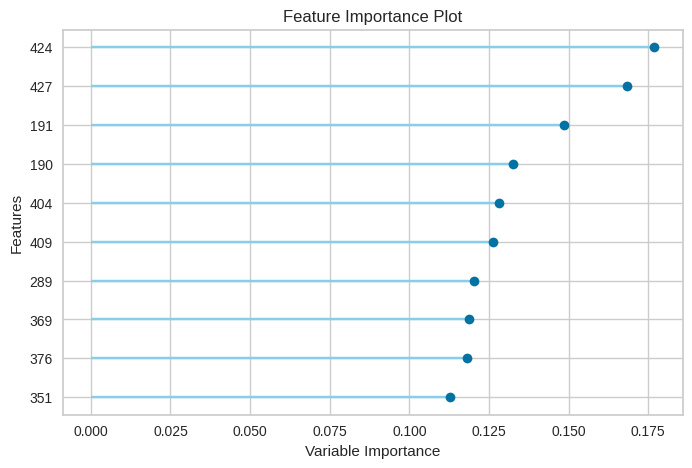

In [29]:
# plot feature importance
plot_model(best, plot = 'feature')

## Save Model

Finally, you can save the entire pipeline on disk for later use, using pycaret's `save_model` function.

In [ ]:
# save pipeline
save_model(best, 'lda')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, c

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('/content/RandomForest')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27', '28', '29', ...],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_feat...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=-1,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

# 👇 Detailed function-by-function overview

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)

## ✅ Tune Model

This function tunes the hyperparameters of the model. The output of this function is a scoring grid with cross-validated scores by fold. The best model is selected based on the metric defined in optimize parameter. Metrics evaluated during cross-validation can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [35]:
# train a LDA model
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3755,0.7303,0.3755,0.3782,0.3748,0.2418,0.2423
1,0.4150,0.7556,0.4150,0.4070,0.4092,0.2861,0.2866
2,0.4901,0.7743,0.4901,0.4859,0.4853,0.3805,0.3812
3,0.4387,0.7649,0.4387,0.4324,0.4305,0.3171,0.3186
4,0.4545,0.7588,0.4545,0.4505,0.4510,0.3342,0.3348
5,0.4190,0.7290,0.4190,0.4230,0.4173,0.2908,0.2915
6,0.4545,0.7415,0.4545,0.4518,0.4501,0.3349,0.3361
7,0.3874,0.7314,0.3874,0.3925,0.3880,0.2568,0.2574
8,0.4466,0.7467,0.4466,0.4442,0.4423,0.3257,0.3267


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
# tune hyperparameters of lda
tuned_dt = tune_model(lda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4585,0.7632,0.4585,0.4682,0.4536,0.3369,0.3389
1,0.4822,0.7873,0.4822,0.4825,0.4763,0.3652,0.3670
2,0.4743,0.8086,0.4743,0.4662,0.4651,0.3594,0.3606
3,0.4822,0.7964,0.4822,0.4800,0.4755,0.3683,0.3697
4,0.4545,0.7766,0.4545,0.4482,0.4470,0.3315,0.3328
5,0.4229,0.7576,0.4229,0.4268,0.4205,0.2939,0.2947
6,0.4387,0.7554,0.4387,0.4355,0.4345,0.3145,0.3155
7,0.4783,0.7863,0.4783,0.4770,0.4760,0.3642,0.3646
8,0.4427,0.7630,0.4427,0.4566,0.4389,0.3166,0.3188


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Metric to optimize can be defined in `optimize` parameter (default = 'Accuracy'). Also, a custom tuned grid can be passed with `custom_grid` parameter.

In [36]:
lda

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

The default search algorithm is `RandomizedSearchCV` from `sklearn`. This can be changed by using `search_library` and `search_algorithm` parameter.

## ✅ Ensemble Model

This function ensembles a given estimator. The output of this function is a scoring grid with CV scores by fold. Metrics evaluated during CV can be accessed using the `get_metrics` function. Custom metrics can be added or removed using `add_metric` and `remove_metric` function.

In [39]:
# ensemble with bagging
ensemble_model(lda, method = 'Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3557,0.7200,0.3557,0.3621,0.3544,0.2138,0.2149
1,0.4506,0.7458,0.4506,0.4486,0.4490,0.3305,0.3307
2,0.4822,0.7591,0.4822,0.4811,0.4757,0.3725,0.3747
3,0.4387,0.7580,0.4387,0.4369,0.4332,0.3165,0.3178
4,0.3913,0.7468,0.3913,0.3838,0.3861,0.2565,0.2569
5,0.3953,0.7319,0.3953,0.3986,0.3924,0.2619,0.2628
6,0.4190,0.7365,0.4190,0.4155,0.4136,0.2915,0.2926
7,0.3794,0.7220,0.3794,0.3800,0.3791,0.2478,0.2480
8,0.4308,0.7355,0.4308,0.4346,0.4296,0.3065,0.3073


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(base_estimator='deprecated', bootstrap=True,
                  bootstrap_features=False,
                  estimator=LinearDiscriminantAnalysis(covariance_estimator=None,
                                                       n_components=None,
                                                       priors=None,
                                                       shrinkage=None,
                                                       solver='svd',
                                                       store_covariance=False,
                                                       tol=0.0001),
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=123, verbose=0,
                  warm_start=False)

## ✅ Save / Load Model
This function saves the transformation pipeline and a trained model object into the current working directory as a pickle file for later use.

In [41]:
# save model
save_model(best, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['0', '1', '2', '3', '4', '5', '6',
                                              '7', '8', '9', '10', '11', '12',
                                              '13', '14', '15', '16', '17', '18',
                                              '19', '20', '21', '22', '23', '24',
                                              '25', '26', '27', '28', '29', ...],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_ind

In [42]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['0', '1', '2', '3', '4', '5', '6',
                                             '7', '8', '9', '10', '11', '12',
                                             '13', '14', '15', '16', '17', '18',
                                             '19', '20', '21', '22', '23', '24',
                                             '25', '26', '27', '28', '29', ...],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_feat...
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('trained_model',
                 LinearDiscriminantAnalysis(covariance_estimator=None,
                                            n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001))],
         verbose=False)

## ✅ Save / Load Experiment
This function saves all the experiment variables on disk, allowing to later resume without rerunning the setup function.

In [43]:
# save experiment
save_experiment('my_experiment')

In [44]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Target,emotion
2,Target type,Multiclass
3,Original data shape,"(3614, 436)"
4,Transformed data shape,"(3614, 436)"
5,Transformed train set shape,"(2529, 436)"
6,Transformed test set shape,"(1085, 436)"
7,Numeric features,435
8,Preprocess,True
9,Imputation type,simple
